In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from pycaret.regression import setup,compare_models
from sklearn.model_selection import KFold,cross_val_score

from sklearn.linear_model import BayesianRidge,Ridge,OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor




In [2]:
path="C:\\Users\\admin\\Desktop\\DS Docs\\house-prices-advanced-regression-techniques\\train.csv"
path1="C:\\Users\\admin\\Desktop\\DS Docs\\house-prices-advanced-regression-techniques\\test.csv"
path2="C:\\Users\\admin\\Desktop\\DS Docs\\house-prices-advanced-regression-techniques\\sample_submission.csv"

train=pd.read_csv(path)
test=pd.read_csv(path1)
sample_submissions=pd.read_csv(path2)

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Data Cleaning

In [5]:
pd.options.display.max_rows=90
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#ombine train and test data for cleaning
target=train['SalePrice']
test_ids=test['Id']

train1=train.drop(['Id','SalePrice'],axis=1)
test1=test.drop('Id',axis=1)

data1=pd.concat([train1,test1],axis=0).reset_index(drop=True)

In [8]:
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [10]:
#Data types
data1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [11]:
data2=data1.copy()

In [12]:
# Changing Data Type Of MSSubClass Column As It Is A Categorical Column
data2['MSSubClass']=data2['MSSubClass'].astype(str)

In [13]:
#Missing value teatment for catogorial data

#Some features have meaning to na values ex. In Alley column has na for no alley

#Impute using constant value

for column in[
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
    
    
    
    
]:
    data2[column]=data2[column].fillna('None')

#Impute using column mode
for column in[
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
    
    
    
]:
    data2[column]=data2[column].fillna(data2[column].mode()[0])



In [14]:
data2.select_dtypes('object').loc[:,data2.isna().sum()>0].columns

Index([], dtype='object')

In [15]:
data2.select_dtypes('object').isna().sum().sum()

0

In [16]:
data2.select_dtypes(np.number).isna().sum().sum()

678

In [17]:
data3=data2.copy()

In [18]:
##Missing value treatment for numeric data
#Imputing numeric missing values using Regression "(KNN imputation)"

data3.select_dtypes(np.number).isna().sum()


LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [19]:
data3.loc[data3['LotFrontage'].isna()==False,'LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2433, dtype: float64

In [20]:
def knn_impute(df,na_target):
    df=df.copy()
    
    numeric_df=df.select_dtypes(np.number)
    non_na_cloumns=numeric_df.loc[:,numeric_df.isna().sum()==0].columns
    
    y_train=numeric_df.loc[numeric_df[na_target].isna()==False,na_target]
    X_train=numeric_df.loc[numeric_df[na_target].isna()==False,non_na_cloumns]
    X_test=numeric_df.loc[numeric_df[na_target].isna()==True,non_na_cloumns]
    
    knn=KNeighborsRegressor()
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    
    df.loc[df[na_target].isna()==True,na_target]=y_pred

    
    return df

In [21]:
knn_impute(data3,'LotFrontage')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [22]:
knn_impute(data3,'LotFrontage').isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath 

In [23]:
data3.columns[data3.isna().sum()>0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [24]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    data3=knn_impute(data3,column)

In [25]:
data3.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [26]:
data4=data3.copy()

# Feature Transformation
   Feature transformation is done to remove skewness in data distribution.
   Use log transform to remove skewness from data.Skewness above 0.5 needs to be transformed to normal distribution

In [27]:
data3.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [28]:
scipy.stats.skew(data3['LotFrontage'])

1.3407511399227516

In [29]:
#Creating a new dataframe for skew values of all columns with numeric data
skew_df=pd.DataFrame(data4.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['Absolute_Skew']=skew_df['Skew'].apply(abs) #Neglecting the signs of skew value (negative or positive skew)
skew_df['Skewed']=skew_df['Absolute_Skew'].apply(lambda x:True if x>=0.5 else False)
skew_df

,Feature,Skew,Absolute_Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [30]:
skew_df.query("Skewed==True")['Feature'].values

array(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [31]:
for column in skew_df.query("Skewed==True")['Feature'].values:
    data4[column]=np.log1p(data4[column])

In [32]:
skew_df=pd.DataFrame(data4.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['Absolute_Skew']=skew_df['Skew'].apply(abs) 
skew_df['Skewed']=skew_df['Absolute_Skew'].apply(lambda x:True if x>=0.5 else False)
skew_df

,Feature,Skew,Absolute_Skew,Skewed
0,LotFrontage,-0.929468,0.929468,True
1,LotArea,-0.504751,0.504751,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,-0.746183,0.746183,True
4,YearBuilt,-0.626215,0.626215,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,0.511138,0.511138,True
7,BsmtFinSF1,-0.618036,0.618036,True
8,BsmtFinSF2,2.458996,2.458996,True
9,BsmtUnfSF,-2.159204,2.159204,True


In [33]:
#Month column needs to be processed as they are cyclic
#December=12 is close to January=1
#Apply sine or cosine trnsform to add cyclic effect
data4['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [34]:
#0.5236 is added to align the 0 and 12 to the point on the graph or the transform value
-np.cos(0.5236*data4['MoSold'])

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -1.000000
          ...   
2914    1.000000
2915    0.500004
2916   -0.000011
2917    0.866021
2918   -0.866032
Name: MoSold, Length: 2919, dtype: float64

In [35]:
print(-np.cos(0.5236*12)) #cos trnsform for December
print(-np.cos(0.5236*1))  #cos trnsform for January
print(-np.cos(0.5236*6))  #cos trnsform for June

-0.9999999998920606
-0.866024791582939
0.9999999999730151


In [36]:
data4['MoSold']=(-np.cos(0.5236*data4['MoSold']))

In [37]:
data4['MoSold']

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -1.000000
          ...   
2914    1.000000
2915    0.500004
2916   -0.000011
2917    0.866021
2918   -0.866032
Name: MoSold, Length: 2919, dtype: float64

In [38]:
data5=data4.copy()

# Emcoding Catogorial Data

In [39]:
data5=pd.get_dummies(data5)
data5


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,...,0,0,0,1,0,0,0,0,1,0
2915,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,...,0,0,0,1,1,0,0,0,0,0
2916,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.0,6.356108,...,0,0,0,1,0,0,0,0,1,0


In [40]:
data6=data5.copy()

# Scaling

In [41]:
scaler=StandardScaler()
scaler.fit(data6)

data6=pd.DataFrame(scaler.transform(data6), index=data6.index, columns=data6.columns)
data6

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [42]:
data7=data6.copy()

# Target Transformatio

<Figure size 1440x720 with 0 Axes>

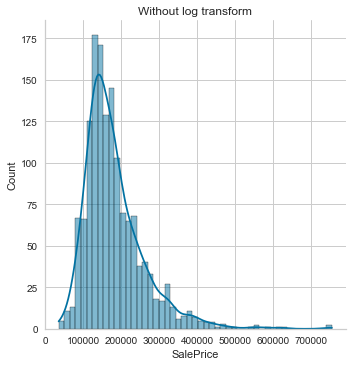

In [43]:
#Target without log trnsformation
plt.figure(figsize=(20,10))
sns.displot(target,kde=True)
plt.title("Without log transform")
plt.show()

<Figure size 1440x720 with 0 Axes>

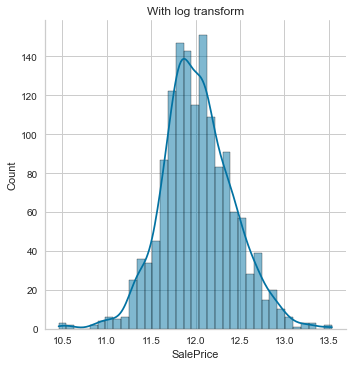

In [44]:
#Target with log trnsformation
plt.figure(figsize=(20,10))
sns.displot(np.log(target),kde=True)
plt.title("With log transform")
plt.show()

In [45]:
log_target=np.log(target)
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# Split train and test data

In [46]:
train.index.max()

1459

In [47]:
data6.loc[:train.index.max(),:]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [48]:
data6.loc[train.index.max()+1:,:]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1461,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1462,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1463,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1464,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [49]:
train_final=data7.loc[:train.index.max(),:].copy()
test_final=data7.loc[train.index.max()+1:,:].reset_index(drop=True).copy()

In [50]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [51]:
test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


# Model Selection

In [52]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [53]:
_=setup(data=pd.concat([train_final,log_target],axis=1),target='SalePrice')

,Description,Value
0,Session id,7543
1,Target,SalePrice
2,Target type,Regression
3,Data shape,"(1460, 312)"
4,Train data shape,"(1021, 312)"
5,Test data shape,"(439, 312)"
6,Numeric features,317
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [54]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0893,0.0169,0.1277,0.8949,0.0099,0.0075,0.2440
lightgbm,Light Gradient Boosting Machine,0.0915,0.0178,0.1318,0.8865,0.0102,0.0077,0.1100
br,Bayesian Ridge,0.0900,0.0199,0.1371,0.8724,0.0106,0.0075,0.0500
rf,Random Forest Regressor,0.0985,0.0207,0.1425,0.8685,0.0110,0.0082,0.4000
omp,Orthogonal Matching Pursuit,0.0907,0.0217,0.1435,0.8608,0.0111,0.0076,0.0400
et,Extra Trees Regressor,0.1023,0.0224,0.1474,0.8596,0.0114,0.0086,0.4360
ridge,Ridge Regression,0.0945,0.0226,0.1460,0.8546,0.0113,0.0079,0.0410
ada,AdaBoost Regressor,0.1283,0.0290,0.1691,0.8147,0.0131,0.0107,0.2300
knn,K Neighbors Regressor,0.1499,0.0456,0.2118,0.7083,0.0163,0.0125,0.0450
dt,Decision Tree Regressor,0.1532,0.0515,0.2247,0.6621,0.0174,0.0128,0.0480


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=7543)

# Baseline model

from sklearn.linear_model import BayesianRidge,Ridge,OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor

In [55]:
baseline_model=GradientBoostingRegressor()
baseline_model.fit(train_final,log_target)


GradientBoostingRegressor()

In [56]:
br=BayesianRidge()
br.fit(train_final,log_target)

BayesianRidge()

# Evaluate

In [57]:
kf=KFold(n_splits=10)
result=cross_val_score(baseline_model,train_final,log_target,scoring='neg_mean_squared_error',cv=kf)

In [58]:
-result

array([0.01702603, 0.01040318, 0.01388308, 0.02716396, 0.02376667,
       0.01217735, 0.01663342, 0.01168927, 0.0138822 , 0.01980886])

In [59]:
kf=KFold(n_splits=10)
result1=cross_val_score(br,train_final,log_target,scoring='neg_mean_squared_error',cv=kf)

In [60]:
-result1

array([0.0141834 , 0.01049128, 0.01429204, 0.02437928, 0.02048347,
       0.01779531, 0.01458987, 0.00965417, 0.0328459 , 0.01642498])

In [61]:
np.exp(np.sqrt(np.mean(-result))) #Gradient Boosting

1.1377007187703008

In [62]:
np.exp(np.sqrt(np.mean(-result1))) #Baysian Ridge

1.1414967721577334

<AxesSubplot:ylabel='Density'>

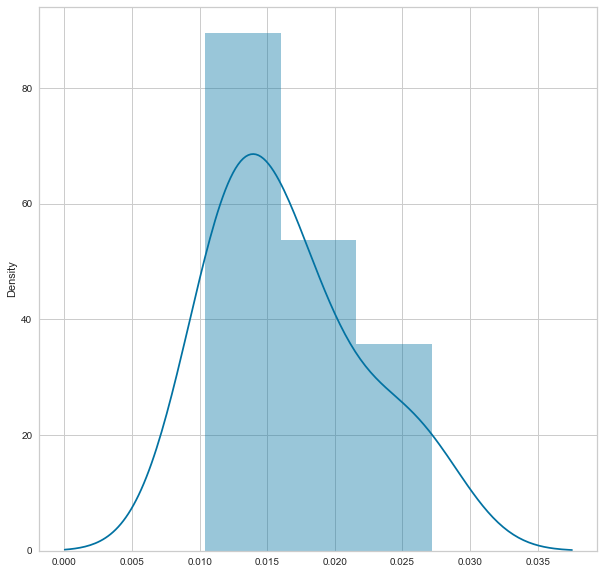

In [63]:
#GBR
plt.figure(figsize=(10,10)) 

sns.distplot(-result,kde=True)

<AxesSubplot:ylabel='Density'>

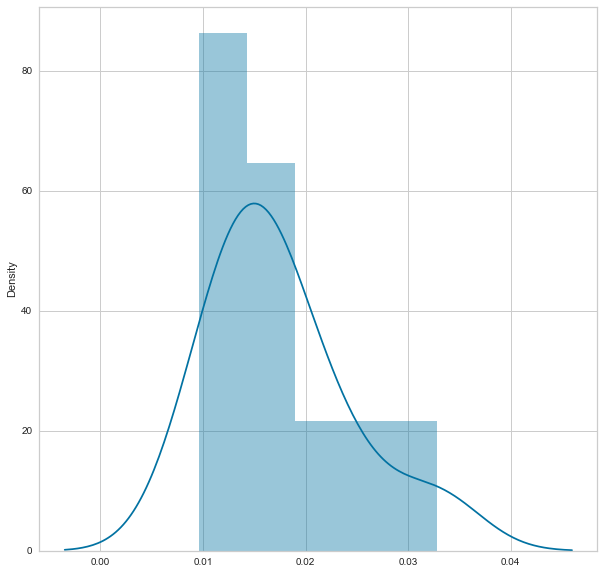

In [64]:
#BR
plt.figure(figsize=(10,10)) 

sns.distplot(-result1,kde=True)

# Make submission

In [65]:
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [66]:
sample_submissions

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [67]:
submission=pd.concat([test_ids,pd.Series(final_predictions,name='SalePrice')],axis=1)
submission

NameError: name 'final_predictions' is not defined

In [ ]:
submission.to_csv('./submission1.csv',index=False,header=True)

# Bagging Enemble

In [68]:
models={
    "br":BayesianRidge(),
    "gbr":GradientBoostingRegressor(),
    "lightgbm":LGBMRegressor(),
    "Ridge":Ridge(),
    "omp":OrthogonalMatchingPursuit()
}

In [69]:
for name, model in models.items():
    model.fit(train_final,log_target)
    print(name+" trained")

br trained
gbr trained
lightgbm trained
Ridge trained
omp trained


In [70]:
results={}
kf=KFold(n_splits=10)

for name, model in models.items():
    result=np.exp(np.sqrt(-cross_val_score(baseline_model,train_final,log_target,scoring='neg_mean_squared_error',cv=kf)))
    results[name]=result
results

{'br': array([1.13666981, 1.1078719 , 1.12368061, 1.17751245, 1.16541877,
        1.11619492, 1.13978292, 1.11395661, 1.12683751, 1.15105093]),
 'gbr': array([1.13893443, 1.10793472, 1.1250547 , 1.17914381, 1.16593981,
        1.11541946, 1.13812815, 1.11423748, 1.12712899, 1.15146398]),
 'lightgbm': array([1.1400367 , 1.10789767, 1.12394551, 1.17915554, 1.16630942,
        1.11540012, 1.13851655, 1.11337493, 1.12316601, 1.15178177]),
 'Ridge': array([1.13752757, 1.10807155, 1.12320279, 1.16849124, 1.16574289,
        1.11601536, 1.14260917, 1.11396693, 1.12245589, 1.15173996]),
 'omp': array([1.13814029, 1.10884098, 1.1231801 , 1.17740456, 1.16615045,
        1.116257  , 1.13675413, 1.11414639, 1.12817277, 1.15187692])}

<Figure size 1440x720 with 0 Axes>

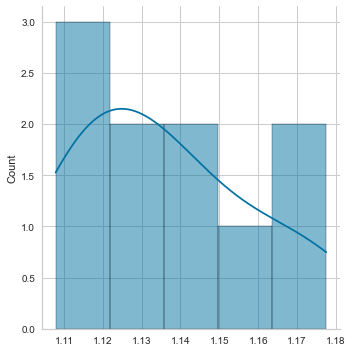

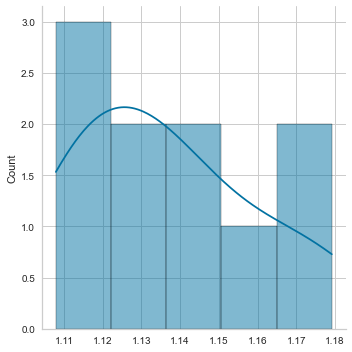

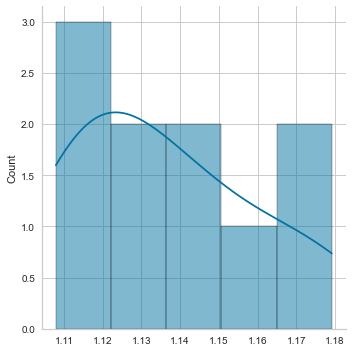

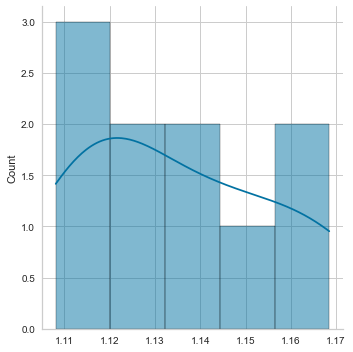

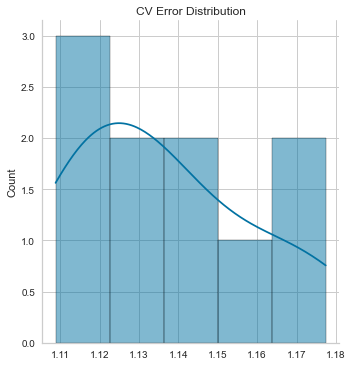

In [71]:
plt.figure(figsize=(20,10))

for name, model in models.items():
    sns.displot(results[name],kde=True,label=name)
    
plt.title("CV Error Distribution")
plt.show()
        

In [72]:
for name, result in results.items():
    print("---------\n"+name+"\n---------\n")
    print(np.mean(result))
    print(np.std(result))

---------
br
---------

1.1358976441768225
0.02176003798588621
---------
gbr
---------

1.1363385524070724
0.02211838389422169
---------
lightgbm
---------

1.135958420511232
0.022558255035254403
---------
Ridge
---------

1.1349823344041847
0.020581002136883533
---------
omp
---------

1.1360923582470308
0.021705118893227085


# Combine results from all selected models

In [73]:
final_predictions=(
    0.2*np.exp(models['br'].predict(test_final))+
    0.2*np.exp(models['gbr'].predict(test_final))+
    0.2*np.exp(models['lightgbm'].predict(test_final))+
    0.2*np.exp(models['Ridge'].predict(test_final))+
    0.2*np.exp(models['omp'].predict(test_final))
)
final_predictions


array([123428.33054347, 159397.13849474, 185160.67015722, ...,
       165470.55464168, 118230.28906105, 222988.09253938])

In [76]:
bagging_submission=pd.concat([test_ids,pd.Series(final_predictions,name='SalePrice')],axis=1)

In [77]:
bagging_submission

,Id,SalePrice
0,1461,123428.330543
1,1462,159397.138495
2,1463,185160.670157
3,1464,195618.146915
4,1465,196968.234667
...,...,...
1454,2915,82836.099659
1455,2916,83584.102662
1456,2917,165470.554642
1457,2918,118230.289061


In [79]:
bagging_submission.to_csv("C:\\Users\\admin\\Desktop\\GITHUB Projects\\KK\\House Price Regression Advanced Techniques\\final_sub.csv",index=False,header=True)